Setting Up The Model Architecture

In [ ]:
!pip install tensorflow

In [1]:
# Importing the libraries that we will be using for building the neural network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input

In [4]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input= Input(shape=2) # can take 2 inputs at a time

# this technique is called functional API
x=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer,name="firstDenseLayer")(input)  # new dense layer created connected to input layer
x=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x) # new dense layer created connected to x layer
x1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x)
x2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x)
out1=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x1)
out2=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(x2)



In [5]:
from tensorflow.keras.models import Model

In [6]:
model=Model([input],[out1,out2]) 

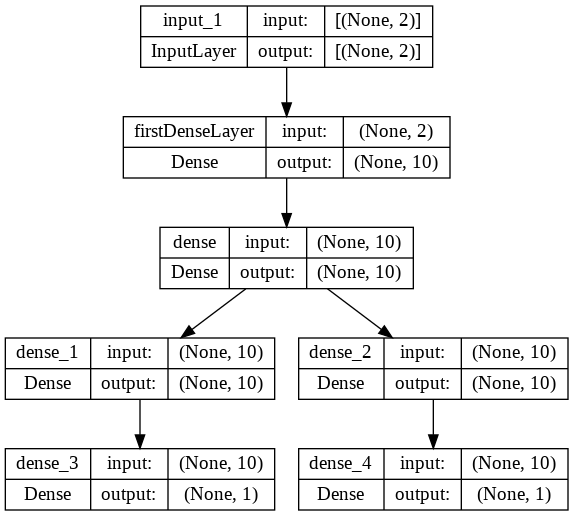

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
path='/content/drive/MyDrive/CSE 4-2/CSE-442/Codes/DataDeepLearning.csv'


In [9]:
import pandas
inputDataFrame=pandas.read_csv(path)
inputDataFrame

,x1,x2,y1=4*x1+5*x2+5,y2=10*x1+10*x2,y3=3*x1+10*x2
0,80,58,615,1380,820
1,19,87,516,1060,927
2,81,4,349,850,283
3,25,34,275,590,415
4,8,63,352,710,654
...,...,...,...,...,...
994,49,8,241,570,227
995,23,90,547,1130,969
996,85,23,460,1080,485
997,42,18,263,600,306


In [10]:
# Getting the data out as numpy arrays
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [11]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x=np.concatenate((x1s,x2s),axis=1) 

In [12]:
x1s.shape

(999, 1)

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y2sTrain, y2sTest, y3sTrain, y3sTest = train_test_split(x,y2s,y3s, test_size=0.20, random_state=42)

In [14]:
print(f'the shape of xTrain = {xTrain.shape}')
print(f'the shape of y2sTrain = {y2sTrain.shape}')
print(f'the shape of y2sTrain = {y3sTrain.shape}')
print(f'the shape of xTest = {xTest.shape}')
print(f'the shape of y2sTrain = {y2sTest.shape}')
print(f'the shape of y2sTrain = {y3sTest.shape}')


the shape of xTrain = (799, 2)
the shape of y2sTrain = (799,)
the shape of y2sTrain = (799,)
the shape of xTest = (200, 2)
the shape of y2sTrain = (200,)
the shape of y2sTrain = (200,)


In [15]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [16]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(x=xTrain,y=[y2sTrain,y3sTrain],validation_data=(xTest,[y2sTest,y3sTest]),batch_size=256, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 88ms/step - loss: 91701032.0000 - dense_3_loss: 33400430.0000 - dense_4_loss: 58300608.0000 - dense_3_mse: 33400430.0000 - dense_4_mse: 58300608.0000 - val_loss: 52354992.0000 - val_dense_3_loss: 18029876.0000 - val_dense_4_loss: 34325112.0000 - val_dense_3_mse: 18029876.0000 - val_dense_4_mse: 34325112.0000
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 44412272.0000 - dense_3_loss: 14986471.0000 - dense_4_loss: 29425800.0000 - dense_3_mse: 14986471.0000 - dense_4_mse: 29425800.0000 - val_loss: 24513454.0000 - val_dense_3_loss: 7635730.0000 - val_dense_4_loss: 16877724.0000 - val_dense_3_mse: 7635730.0000 - val_dense_4_mse: 16877724.0000
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 20692446.0000 - dense_3_loss: 6264516.0000 - dense_4_loss: 14427928.0000 - dense_3_mse: 6264516.0000 - dense_4_mse: 14427928.0000 - val_loss: 11453272.0000 - val_dense_3_loss: 3101766.5000 - val_dense_4

In [17]:
input=xTest[60].reshape(1,2)
output=model.predict(input)

1/1 [==============================] - 0s 97ms/step


In [ ]:
input

array([[68, 84]])

In [ ]:
y2sTest[60]

1520

In [ ]:
y3sTest[60]

1044

In [ ]:
output

[array([[1524.232]], dtype=float32), array([[1028.2251]], dtype=float32)]